In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [5]:
df = load_iris()
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [21]:
iris_data = pd.DataFrame(data = df.data, columns=df.feature_names)

iris_data.head()
iris_data.columns

iris_data = iris_data.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
iris_data.columns

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

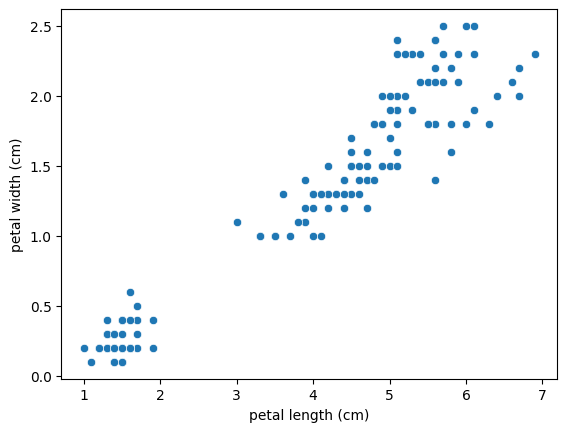

In [23]:
sns.scatterplot(data = iris_data, x = 'petal length (cm)',y = 'petal width (cm)')

In [27]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()
sclr.fit(iris_data[['petal width (cm)']])

iris_data_scaled = iris_data.copy()
iris_data_scaled['petal width (cm)'] = sclr.transform(iris_data_scaled[['petal width (cm)']])

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

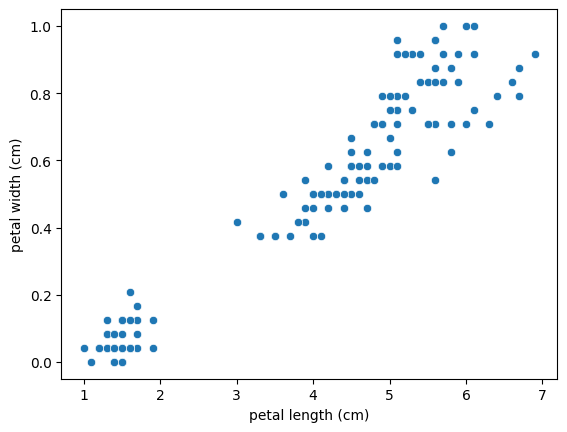

In [29]:
sns.scatterplot(data = iris_data_scaled, x = 'petal length (cm)',y = 'petal width (cm)')

<Axes: >

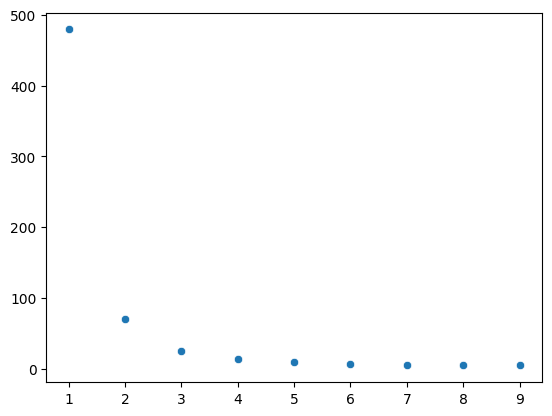

In [31]:
from sklearn.cluster import KMeans

km_range = range(1,10)
sse = []

for k in km_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(iris_data_scaled[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)
    
sns.scatterplot(x = km_range, y = sse)

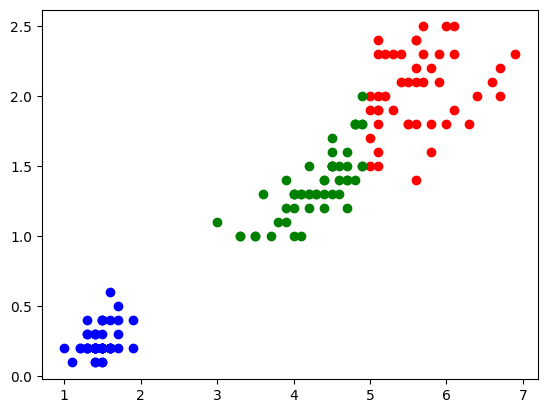

In [32]:
km = KMeans(n_clusters=3)
iris_data['cluster'] = y_pred = km.fit_predict(iris_data_scaled[['petal length (cm)', 'petal width (cm)']])

df1 = iris_data[iris_data.cluster == 0]
df2 = iris_data[iris_data.cluster == 1]
df3 = iris_data[iris_data.cluster == 2]

plt.scatter(data = df1, x = 'petal length (cm)', y= 'petal width (cm)', color = 'red')
plt.scatter(data = df2, x = 'petal length (cm)', y= 'petal width (cm)', color = 'blue')
plt.scatter(data = df3, x = 'petal length (cm)', y= 'petal width (cm)', color = 'green')